# K-nearest neighbor algorithm

Predict how many points NBA players scored in the 2013-2014 season.

# Data Description

data contains information on how a player performed in the 2013-2014 NBA season. csv file is available in the below link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

Here are some selected columns from the data:

 player - name of the player
 
 pos - the position of the player
 
 g - number of games the player was in
 
 gs - number of games the player started
 
 pts - total points the player scored


There are many more columns in the data, mostly containing information about average
player game performance over the course of the season. See this site for an explanation
of the rest of them.

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [6]:
nba = pd.read_csv("nba_2013.csv")

In [7]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [8]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


##### Check for null values

In [9]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [10]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


#### Identify features whose datatype is object

In [12]:
nba.season.value_counts()

2013-2014    481
Name: season, dtype: int64

In [13]:
nba.season_end.value_counts()

2013    481
Name: season_end, dtype: int64

#### Since season and season_end columns contains same value for the entire dataset. So we can remove these columns

In [14]:
delete_features = ['season', 'season_end']

#### remove object type columns from the dataset

In [16]:
for i in nba.columns:
    if nba[i].dtype == 'object':
        delete_features.append(i)

In [17]:
delete_features

['season', 'season_end', 'player', 'pos', 'bref_team_id', 'season']

#### Add pts column to the deleted features list as this is the target variable

In [18]:
delete_features.append('pts')

In [19]:
X_Feature = nba.drop(delete_features, axis=1)
Y_Feature = nba['pts']

#### Check for null values further

In [20]:
X_Feature.isnull().sum()

age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      2
x3p      0
x3pa     0
x3p.    67
x2p      0
x2pa     0
x2p.     3
efg.     2
ft       0
fta      0
ft.     20
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
dtype: int64

### Data imputation

In [21]:
imp = Imputer(missing_values="NaN", strategy='median', axis=0)
X = imp.fit_transform(X_Feature) 
Y = Y_Feature

In [22]:
print(X.shape,Y.shape)

(481, 25) (481,)


# Test Train split 

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(384, 25)
(97, 25)
(384,)
(97,)


# Apply KNN model

Apply KNN for k value 1 to 20 to check in which k value it works best

In [24]:
for K in range(20):
    K_value = K+1
    neigh = KNeighborsRegressor(n_neighbors = K_value )
    neigh.fit(X_train, Y_train) 
    Y_pred = neigh.predict(X_test)
    print("RMSE is ",np.sqrt(mean_squared_error(Y_pred,Y_test))," for K-Value:",K_value)

RMSE is  109.68530429999018  for K-Value: 1
RMSE is  94.71292762761487  for K-Value: 2
RMSE is  97.62527417669874  for K-Value: 3
RMSE is  96.14675812495263  for K-Value: 4
RMSE is  83.29922710994022  for K-Value: 5
RMSE is  83.0387801177042  for K-Value: 6
RMSE is  88.7759207605298  for K-Value: 7
RMSE is  94.66335241236945  for K-Value: 8
RMSE is  97.96931606717861  for K-Value: 9
RMSE is  103.49740471869406  for K-Value: 10
RMSE is  106.19503735548705  for K-Value: 11
RMSE is  109.1873993323716  for K-Value: 12
RMSE is  107.77454037244564  for K-Value: 13
RMSE is  111.39746743105337  for K-Value: 14
RMSE is  114.8307391265033  for K-Value: 15
RMSE is  117.52106033156859  for K-Value: 16
RMSE is  120.39243270163412  for K-Value: 17
RMSE is  121.85591429029819  for K-Value: 18
RMSE is  123.26325728524043  for K-Value: 19
RMSE is  126.47912331298244  for K-Value: 20


it works best for k value 5,6

In [25]:
K_value = 6
neigh = KNeighborsRegressor(n_neighbors = K_value)
neigh.fit(X_train, Y_train) 
Y_pred = neigh.predict(X_test)
print("RMSE for KNN Regressor is ",np.sqrt(mean_squared_error(Y_pred,Y_test))," for K-Value:",K_value)
print("R Squared for KNN Regressor is ",r2_score(Y_test,Y_pred))

RMSE for KNN Regressor is  83.0387801177042  for K-Value: 6
R Squared for KNN Regressor is  0.9748342374517244


R Squared value is the statistical measure of how close the data points to the regressor line

Text(0.5,1,'Actual vs Predicted points')

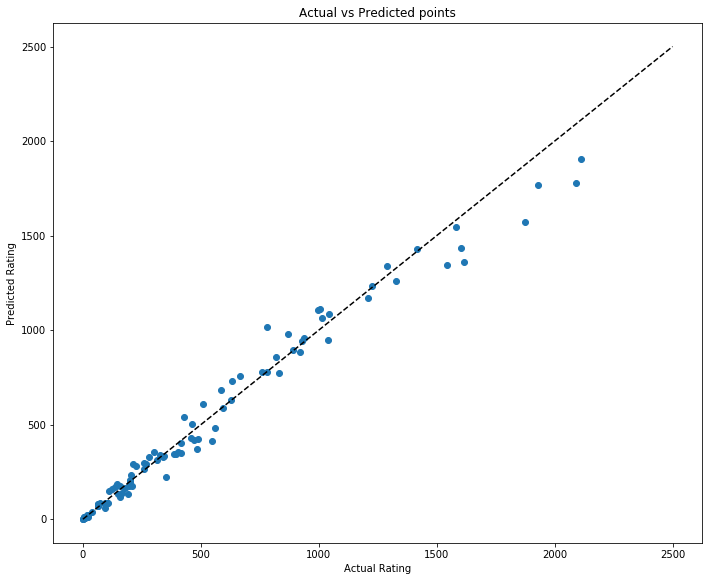

In [26]:

plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred)
plt.plot([0, 2500], [0, 2500], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.tight_layout()
plt.title("Actual vs Predicted points")